# Подсчитаем количество слов в альбоме Облы и поймем кто же он все-таки

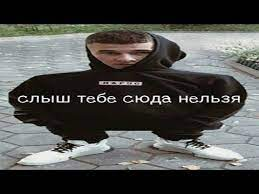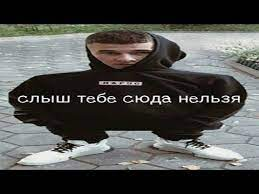

### Импорт либ

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.support.ui import WebDriverWait
import matplotlib.pyplot as plt

### Это опционально(у меня сломался драйвер обычной версии хрома, поставил бету)

In [2]:
chrome_options = webdriver.ChromeOptions()
chrome_options.binary_location="C:\Program Files\Google\Chrome Beta\Application\chrome.exe"

### Находим данные(у меня драйвер в папке с ноутбуком -_-)

In [3]:
driver = webdriver.Chrome(executable_path='chromedriver', options=chrome_options)
driver.get('https://genius.com/albums/Obladaet/Players-club')
tracks = driver.find_element(By.CSS_SELECTOR, 'div[ng-hide="$ctrl.editing_tracklist"]')
songs = tracks.find_elements(By.CSS_SELECTOR, 'a[class="u-display_block"]')
songs_res = []
text = []

for el in songs:
    songs_res.append(el.get_attribute('href'))
    
for song in songs_res:
    driver.get(song)
    WebDriverWait(driver, 30).until(
    ec.presence_of_element_located((By.CSS_SELECTOR, 'div[class="Lyrics__Container-sc-1ynbvzw-6 YYrds"]')) #This is a dummy element
    )
    full = driver.find_elements(By.CSS_SELECTOR, 'div[class="Lyrics__Container-sc-1ynbvzw-6 YYrds"]')
    for el in full:
        text.append(el.text.split())
driver.quit()

### Строим графики

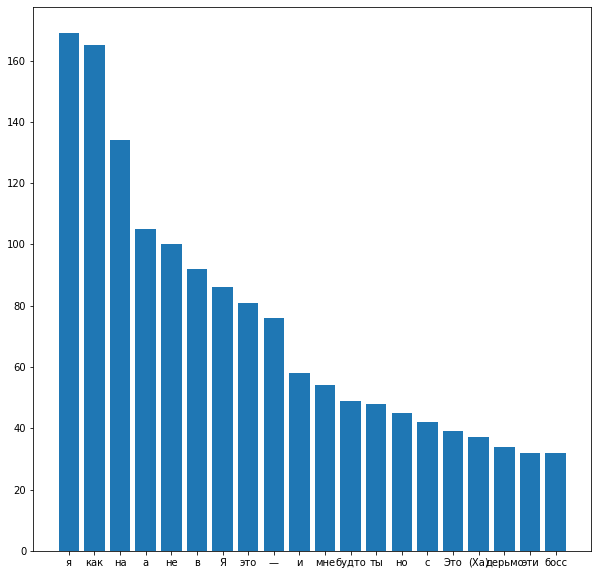

In [4]:
counter = {}
for song in text:
    for word in song:
        if word not in counter:
            counter[word] = 0
        counter[word] += 1
counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))
cntr = list(counter.items())[:20]
x, y = zip(*cntr)
plt.figure(figsize=(10, 10))
plt.bar(x, y);

### Вывод: Он как на а не в

Спасибо за внимание!